In [578]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [579]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [580]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [581]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [582]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [614]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [615]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [616]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [617]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [618]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [619]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [620]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [621]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:05, 22.08it/s]                                                        


Epoch 1 of 100
Generator loss: 1.24361472, Discriminator loss: 0.22704883


118it [00:05, 22.10it/s]                                                        


Epoch 2 of 100
Generator loss: 1.48336120, Discriminator loss: 0.28105453


118it [00:05, 22.04it/s]                                                        


Epoch 3 of 100
Generator loss: 2.23354955, Discriminator loss: 0.21095822


118it [00:05, 22.05it/s]                                                        


Epoch 4 of 100
Generator loss: 0.95205901, Discriminator loss: 0.29049029


118it [00:05, 21.95it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


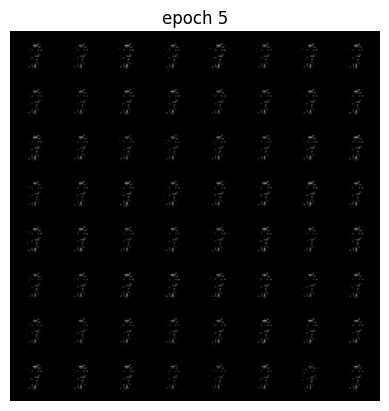

Epoch 5 of 100
Generator loss: 1.18085264, Discriminator loss: 0.26586646


118it [00:05, 22.00it/s]                                                        


Epoch 6 of 100
Generator loss: 0.35923096, Discriminator loss: 0.26977851


118it [00:05, 21.50it/s]                                                        


Epoch 7 of 100
Generator loss: 0.46392996, Discriminator loss: 0.26207700


118it [00:05, 21.81it/s]                                                        


Epoch 8 of 100
Generator loss: 0.43640612, Discriminator loss: 0.25473861


118it [00:05, 21.88it/s]                                                        


Epoch 9 of 100
Generator loss: 0.74017404, Discriminator loss: 0.24364378


118it [00:05, 22.10it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


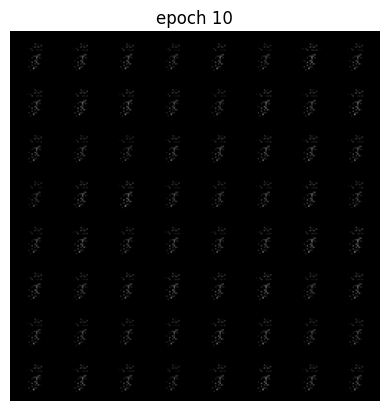

Epoch 10 of 100
Generator loss: 0.45918077, Discriminator loss: 0.25540645


118it [00:05, 21.17it/s]                                                        


Epoch 11 of 100
Generator loss: 1.97743893, Discriminator loss: 0.22517007


118it [00:05, 21.83it/s]                                                        


Epoch 12 of 100
Generator loss: 0.85304004, Discriminator loss: 0.28135511


118it [00:05, 21.80it/s]                                                        


Epoch 13 of 100
Generator loss: 0.72155466, Discriminator loss: 0.21828897


118it [00:05, 21.82it/s]                                                        


Epoch 14 of 100
Generator loss: 1.60747525, Discriminator loss: 0.15378481


118it [00:05, 21.84it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


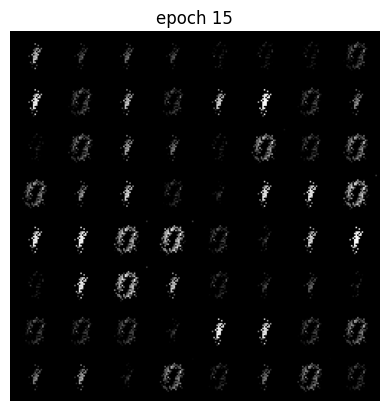

Epoch 15 of 100
Generator loss: 1.82833468, Discriminator loss: 0.13061784


118it [00:05, 21.55it/s]                                                        


Epoch 16 of 100
Generator loss: 1.45505753, Discriminator loss: 0.14252146


118it [00:05, 21.91it/s]                                                        


Epoch 17 of 100
Generator loss: 1.31159362, Discriminator loss: 0.15779161


118it [00:05, 21.92it/s]                                                        


Epoch 18 of 100
Generator loss: 1.23943892, Discriminator loss: 0.15826017


118it [00:05, 21.94it/s]                                                        


Epoch 19 of 100
Generator loss: 1.76974859, Discriminator loss: 0.13967776


118it [00:05, 21.84it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


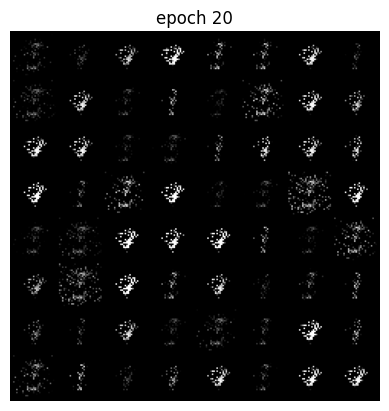

Epoch 20 of 100
Generator loss: 1.71959479, Discriminator loss: 0.15973343


118it [00:05, 21.58it/s]                                                        


Epoch 21 of 100
Generator loss: 1.45820607, Discriminator loss: 0.15193193


118it [00:05, 21.39it/s]                                                        


Epoch 22 of 100
Generator loss: 2.21389684, Discriminator loss: 0.11595072


118it [00:05, 21.75it/s]                                                        


Epoch 23 of 100
Generator loss: 1.54209022, Discriminator loss: 0.14834000


118it [00:05, 21.70it/s]                                                        


Epoch 24 of 100
Generator loss: 1.37897233, Discriminator loss: 0.16040998


118it [00:05, 21.38it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


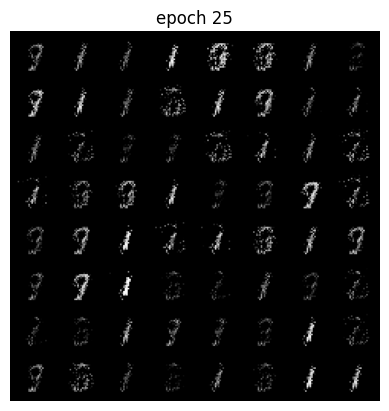

Epoch 25 of 100
Generator loss: 1.20865461, Discriminator loss: 0.17623485


118it [00:05, 20.85it/s]                                                        


Epoch 26 of 100
Generator loss: 1.52283950, Discriminator loss: 0.13336689


118it [00:05, 21.64it/s]                                                        


Epoch 27 of 100
Generator loss: 1.28862682, Discriminator loss: 0.15921679


118it [00:05, 21.76it/s]                                                        


Epoch 28 of 100
Generator loss: 1.69994433, Discriminator loss: 0.16111753


118it [00:05, 21.67it/s]                                                        


Epoch 29 of 100
Generator loss: 1.21158601, Discriminator loss: 0.17666701


118it [00:05, 21.31it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


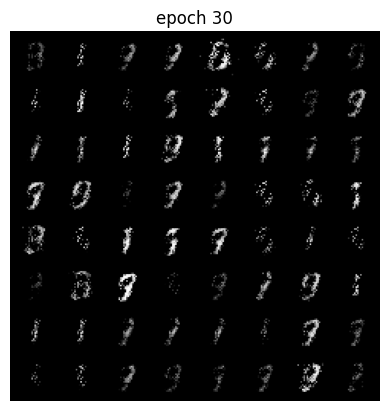

Epoch 30 of 100
Generator loss: 1.08731997, Discriminator loss: 0.16866349


118it [00:05, 21.44it/s]                                                        


Epoch 31 of 100
Generator loss: 1.18517598, Discriminator loss: 0.16127389


118it [00:05, 21.92it/s]                                                        


Epoch 32 of 100
Generator loss: 1.18113041, Discriminator loss: 0.17323591


118it [00:05, 22.08it/s]                                                        


Epoch 33 of 100
Generator loss: 1.26418524, Discriminator loss: 0.15751454


118it [00:05, 21.72it/s]                                                        


Epoch 34 of 100
Generator loss: 1.14755618, Discriminator loss: 0.18673596


118it [00:05, 22.10it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


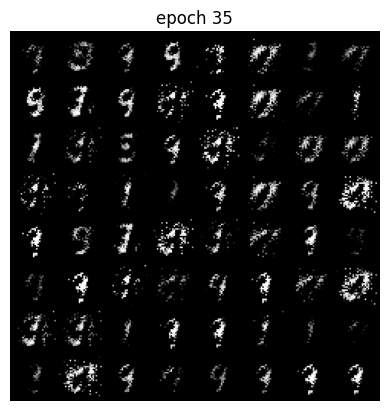

Epoch 35 of 100
Generator loss: 1.38369413, Discriminator loss: 0.14355072


118it [00:05, 22.10it/s]                                                        


Epoch 36 of 100
Generator loss: 1.37668849, Discriminator loss: 0.15420904


118it [00:05, 22.17it/s]                                                        


Epoch 37 of 100
Generator loss: 1.19839107, Discriminator loss: 0.15788314


118it [00:05, 22.10it/s]                                                        


Epoch 38 of 100
Generator loss: 1.33309397, Discriminator loss: 0.16415061


118it [00:05, 22.11it/s]                                                        


Epoch 39 of 100
Generator loss: 1.23205285, Discriminator loss: 0.15899854


118it [00:05, 22.02it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


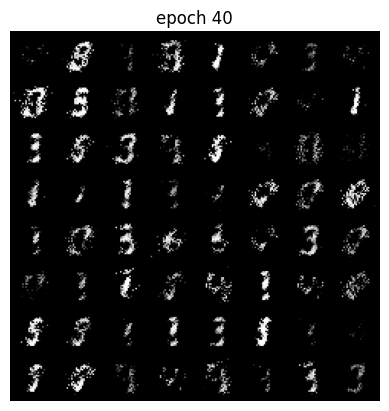

Epoch 40 of 100
Generator loss: 1.08958878, Discriminator loss: 0.17043314


118it [00:05, 21.98it/s]                                                        


Epoch 41 of 100
Generator loss: 1.24032690, Discriminator loss: 0.15774938


118it [00:05, 22.04it/s]                                                        


Epoch 42 of 100
Generator loss: 1.22570622, Discriminator loss: 0.16021060


118it [00:05, 21.47it/s]                                                        


Epoch 43 of 100
Generator loss: 1.10385125, Discriminator loss: 0.17533290


118it [00:05, 21.87it/s]                                                        


Epoch 44 of 100
Generator loss: 1.15760804, Discriminator loss: 0.17336325


118it [00:05, 21.98it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


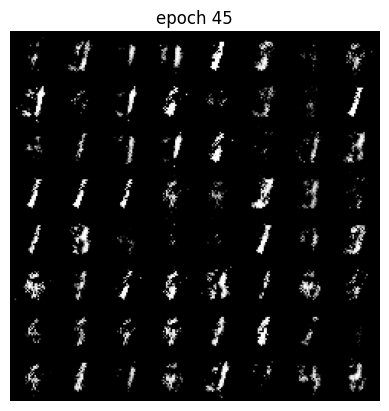

Epoch 45 of 100
Generator loss: 0.92385492, Discriminator loss: 0.19355804


118it [00:05, 21.68it/s]                                                        


Epoch 46 of 100
Generator loss: 1.09484080, Discriminator loss: 0.17411390


118it [00:05, 22.07it/s]                                                        


Epoch 47 of 100
Generator loss: 1.11926614, Discriminator loss: 0.17466347


118it [00:05, 22.01it/s]                                                        


Epoch 48 of 100
Generator loss: 1.08779368, Discriminator loss: 0.17924340


118it [00:05, 21.50it/s]                                                        


Epoch 49 of 100
Generator loss: 1.09676322, Discriminator loss: 0.18184827


118it [00:05, 21.82it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


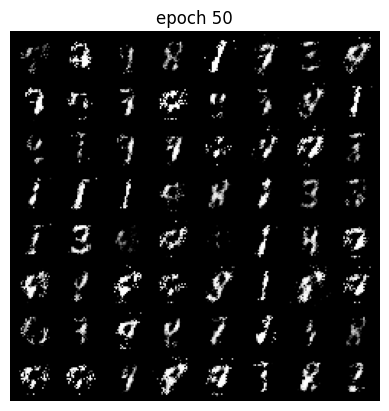

Epoch 50 of 100
Generator loss: 0.92346187, Discriminator loss: 0.19790779


118it [00:05, 21.89it/s]                                                        


Epoch 51 of 100
Generator loss: 0.79344322, Discriminator loss: 0.20882315


118it [00:05, 22.06it/s]                                                        


Epoch 52 of 100
Generator loss: 0.84381538, Discriminator loss: 0.19599923


118it [00:05, 21.44it/s]                                                        


Epoch 53 of 100
Generator loss: 0.97664803, Discriminator loss: 0.18839588


118it [00:05, 22.00it/s]                                                        


Epoch 54 of 100
Generator loss: 0.83671667, Discriminator loss: 0.21602575


118it [00:05, 21.58it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


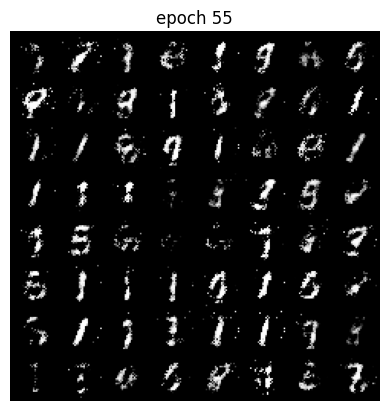

Epoch 55 of 100
Generator loss: 0.88318254, Discriminator loss: 0.19829615


118it [00:05, 21.87it/s]                                                        


Epoch 56 of 100
Generator loss: 0.86468287, Discriminator loss: 0.20160185


118it [00:05, 22.03it/s]                                                        


Epoch 57 of 100
Generator loss: 0.76060497, Discriminator loss: 0.20558014


118it [00:05, 21.79it/s]                                                        


Epoch 58 of 100
Generator loss: 0.81618694, Discriminator loss: 0.21209901


118it [00:05, 21.86it/s]                                                        


Epoch 59 of 100
Generator loss: 0.77338065, Discriminator loss: 0.21867478


118it [00:05, 21.89it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


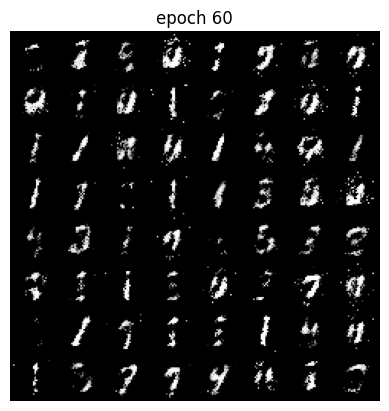

Epoch 60 of 100
Generator loss: 0.79187452, Discriminator loss: 0.21413278


118it [00:05, 21.64it/s]                                                        


Epoch 61 of 100
Generator loss: 0.74940002, Discriminator loss: 0.20293617


118it [00:05, 21.69it/s]                                                        


Epoch 62 of 100
Generator loss: 0.85635531, Discriminator loss: 0.19969636


118it [00:05, 21.93it/s]                                                        


Epoch 63 of 100
Generator loss: 0.83418103, Discriminator loss: 0.22188671


118it [00:05, 21.91it/s]                                                        


Epoch 64 of 100
Generator loss: 0.67561233, Discriminator loss: 0.23229666


118it [00:05, 22.02it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


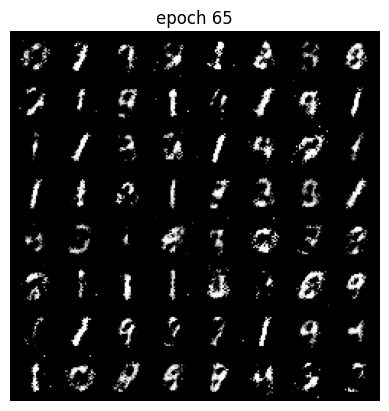

Epoch 65 of 100
Generator loss: 0.71329732, Discriminator loss: 0.21492140


118it [00:05, 21.68it/s]                                                        


Epoch 66 of 100
Generator loss: 0.67822531, Discriminator loss: 0.22961749


118it [00:05, 21.73it/s]                                                        


Epoch 67 of 100
Generator loss: 0.83078991, Discriminator loss: 0.20858592


118it [00:05, 21.96it/s]                                                        


Epoch 68 of 100
Generator loss: 0.75074829, Discriminator loss: 0.22023975


118it [00:05, 22.06it/s]                                                        


Epoch 69 of 100
Generator loss: 0.74776475, Discriminator loss: 0.20787448


118it [00:05, 21.82it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


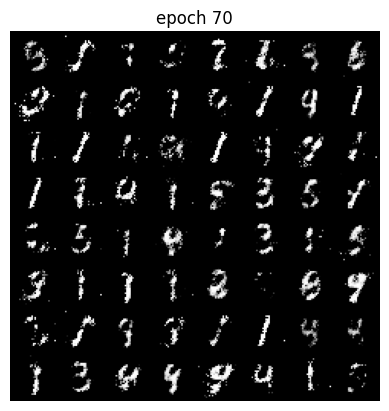

Epoch 70 of 100
Generator loss: 0.74266545, Discriminator loss: 0.21397742


118it [00:05, 22.11it/s]                                                        


Epoch 71 of 100
Generator loss: 0.73781257, Discriminator loss: 0.21983878


118it [00:05, 22.16it/s]                                                        


Epoch 72 of 100
Generator loss: 0.77337358, Discriminator loss: 0.22469733


118it [00:05, 22.13it/s]                                                        


Epoch 73 of 100
Generator loss: 0.74746725, Discriminator loss: 0.22554922


118it [00:05, 22.07it/s]                                                        


Epoch 74 of 100
Generator loss: 0.61341570, Discriminator loss: 0.23898335


118it [00:05, 21.59it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


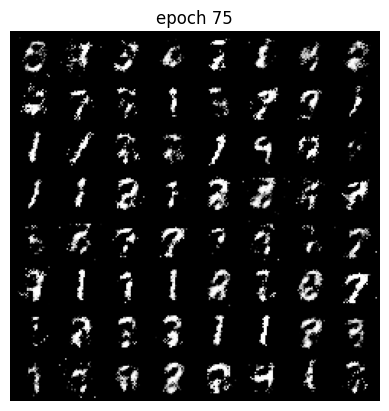

Epoch 75 of 100
Generator loss: 0.64082131, Discriminator loss: 0.23477093


118it [00:05, 22.02it/s]                                                        


Epoch 76 of 100
Generator loss: 0.61027234, Discriminator loss: 0.24045997


118it [00:05, 21.97it/s]                                                        


Epoch 77 of 100
Generator loss: 0.70812483, Discriminator loss: 0.22473431


118it [00:05, 21.68it/s]                                                        


Epoch 78 of 100
Generator loss: 0.70829907, Discriminator loss: 0.21128340


118it [00:05, 21.83it/s]                                                        


Epoch 79 of 100
Generator loss: 0.71736887, Discriminator loss: 0.22069789


118it [00:05, 22.18it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


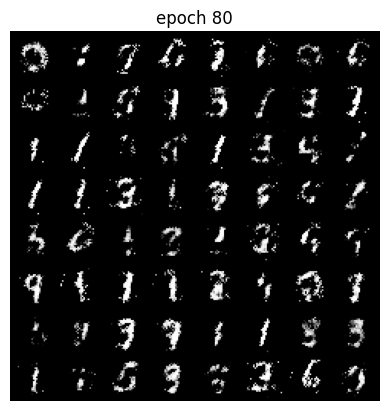

Epoch 80 of 100
Generator loss: 0.58286634, Discriminator loss: 0.24202362


118it [00:05, 22.06it/s]                                                        


Epoch 81 of 100
Generator loss: 0.62214217, Discriminator loss: 0.24276998


118it [00:05, 21.80it/s]                                                        


Epoch 82 of 100
Generator loss: 0.55173142, Discriminator loss: 0.25162855


118it [00:05, 22.11it/s]                                                        


Epoch 83 of 100
Generator loss: 0.53407797, Discriminator loss: 0.25146604


118it [00:05, 22.12it/s]                                                        


Epoch 84 of 100
Generator loss: 0.59920071, Discriminator loss: 0.23591191


118it [00:05, 22.14it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


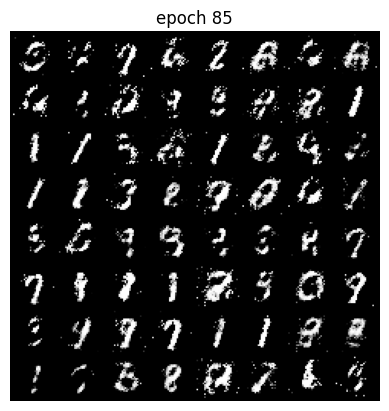

Epoch 85 of 100
Generator loss: 0.61873769, Discriminator loss: 0.24254624


118it [00:05, 22.11it/s]                                                        


Epoch 86 of 100
Generator loss: 0.57721668, Discriminator loss: 0.25033862


118it [00:05, 22.18it/s]                                                        


Epoch 87 of 100
Generator loss: 0.55965790, Discriminator loss: 0.23902185


118it [00:05, 22.22it/s]                                                        


Epoch 88 of 100
Generator loss: 0.62449970, Discriminator loss: 0.23549557


118it [00:05, 21.94it/s]                                                        


Epoch 89 of 100
Generator loss: 0.59760558, Discriminator loss: 0.25040936


118it [00:05, 21.86it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


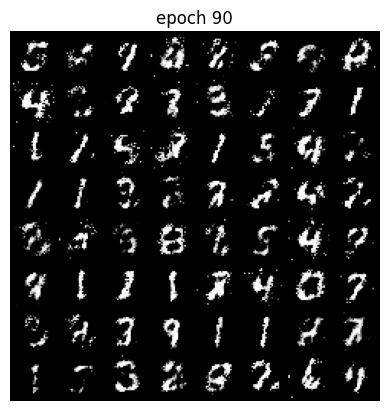

Epoch 90 of 100
Generator loss: 0.61168625, Discriminator loss: 0.24386530


118it [00:05, 21.89it/s]                                                        


Epoch 91 of 100
Generator loss: 0.55037102, Discriminator loss: 0.24365282


118it [00:05, 21.96it/s]                                                        


Epoch 92 of 100
Generator loss: 0.58396632, Discriminator loss: 0.23495262


118it [00:05, 21.84it/s]                                                        


Epoch 93 of 100
Generator loss: 0.63329545, Discriminator loss: 0.23295484


118it [00:05, 21.59it/s]                                                        


Epoch 94 of 100
Generator loss: 0.54833291, Discriminator loss: 0.25128719


118it [00:05, 22.09it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


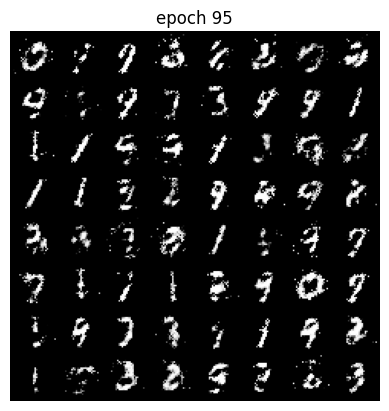

Epoch 95 of 100
Generator loss: 0.53883189, Discriminator loss: 0.25644878


118it [00:05, 22.03it/s]                                                        


Epoch 96 of 100
Generator loss: 0.50211045, Discriminator loss: 0.25533542


118it [00:05, 22.13it/s]                                                        


Epoch 97 of 100
Generator loss: 0.51294040, Discriminator loss: 0.24889353


118it [00:05, 22.03it/s]                                                        


Epoch 98 of 100
Generator loss: 0.53600278, Discriminator loss: 0.25041776


118it [00:05, 22.12it/s]                                                        


Epoch 99 of 100
Generator loss: 0.45527738, Discriminator loss: 0.26577930


118it [00:05, 22.07it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


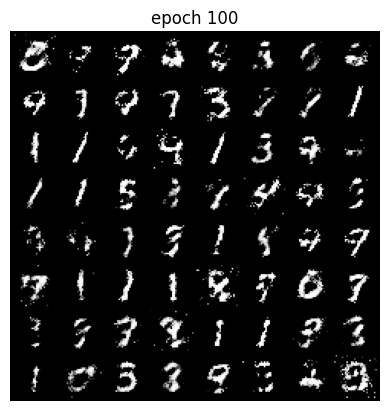

Epoch 100 of 100
Generator loss: 0.41470254, Discriminator loss: 0.27167969


In [622]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    # use negative loss for original generator optimization problem
    return criterion(output, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
    ######################################
    
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        optim_d.zero_grad()
        optim_g.zero_grad()
        
        sample_noise = create_noise(sample_size, nz)
        false_inputs = generator(sample_noise)
        false_labels = torch.zeros(sample_size, 1)
        true_inputs, targets = data
        true_labels = torch.ones(len(true_inputs), 1)
        inputs = torch.cat([false_inputs, true_inputs])
        labels = torch.cat([false_labels, true_labels])
        outputs = discriminator(inputs)
        loss = discriminator_loss(outputs, labels)
        loss.backward()
        optim_d.step()
        loss_d += loss.item()
        
        optim_g.zero_grad()
        sample_noise = create_noise(4*sample_size, nz)
        inputs_g = generator(sample_noise)
        labels_g = torch.ones(4*sample_size, 1)
        # label as false for original generator optimization problem
        #labels_g = torch.zeros(sample_size, 1)
        outputs_g = discriminator(inputs_g)
        loss = generator_loss(outputs_g, labels_g)
        loss.backward()
        #if epoch < 25:
        #    if bi % 5==0:
        #        optim_g.step()
        #else:
        optim_g.step()
        loss_g += loss.item()
        
        
        
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_imp_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [623]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [624]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_imp_images.gif', imgs)

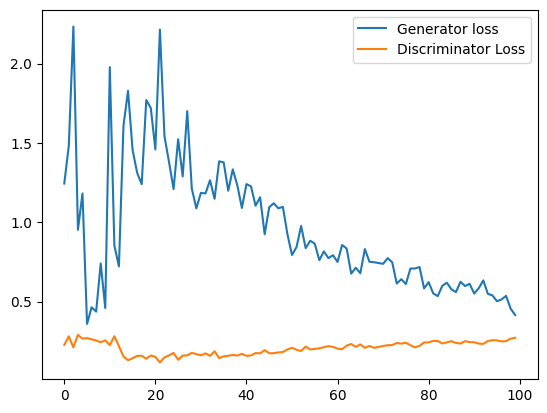

In [625]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss_imp.png')